#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import math

import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Se han encontrado  7  monedas.


Text(0.5, 1.0, 'Original con monedas resaltadas')

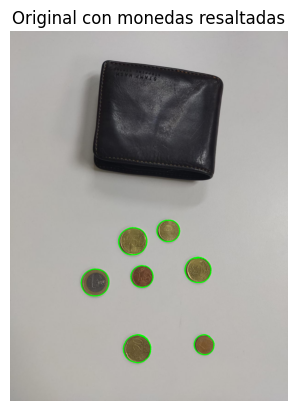

In [2]:
img = cv2.imread('monedas2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th2, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

coins = 0

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    area_min = 500.
    #Dimensión mínima (útil en ocasiones)
    if area > area_min:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        rect_area= rect[1][1] * rect[1][0]
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)
        if 0.85*rect_area < area:
            continue

        #Dibuja los contornos
        cv2.drawContours(img, [c], -1, (0,255,0), 3)
        coins += 1

print("Se han encontrado ", coins, " monedas.")
plt.figure()
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.title('Original con monedas resaltadas')


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




In [1]:
img = cv2.imread('monedas3.jpg')

bronze = (0, 0, 0)
silver = (0, 0, 0)
gold = (0, 0, 0)

#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=50, # Valor del gradiente
        param2=30, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

imgOrig = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
imgOrig = cv2.cvtColor(imgOrig, cv2.COLOR_BGR2RGB)
#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

w = img.shape[0]
h = img.shape[1]

cv2.imshow('Monedas', img)

count = 0

def isSilver(average):
    mask = cv2.inRange(
        average,
        (160, 160, 160),
        (201, 201, 201)
    )

    return np.all(mask == 255)

def isGold(average):
    mask = cv2.inRange(
        average,
        (150, 150, 100),
        (180, 180, 120)
    )

    return np.all(mask == 255)

def clickCallback(e, x, y, flags, param):
    global count
    if e != cv2.EVENT_LBUTTONDOWN:
        return

    selected_circle = None

    for circle in circ[0]:
        if math.sqrt((x-(circle[0]/2))**2 + (y-(circle[1]/2))**2) < circle[2]/2:
            selected_circle = circle
            break
    
    if selected_circle is None:
        return
    
    for circle in circ[0]:
        average = np.average(imgOrig[
                    int(circle[1]/2)-int(circle[2]/4):int(circle[1]/2)+int(circle[2]/4),
                    int(circle[0]/2)-int(circle[2]/4):int(circle[0]/2)+int(circle[2]/4)
                ], axis=0
            )
        average = np.average(average, axis=0)

        if circle[2] > selected_circle[2]*1.03:
            count += 0.5
        elif circle[2] < selected_circle[2]*1.02 and circle[2] > selected_circle[2]*0.97:
            if isSilver(average):
                count += 1
            elif isGold(average):
                count += 0.2
        elif circle[2] < selected_circle[2]*0.96 and circle[2] > selected_circle[2]*0.85:
            count += 0.1
        else:
            count += 0.01

# Asigna la función de manejo de clics a la ventana
cv2.setMouseCallback('Monedas', clickCallback)

cv2.waitKey(0)
cv2.destroyAllWindows()
print(count)

NameError: name 'cv2' is not defined

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

<Axes: >

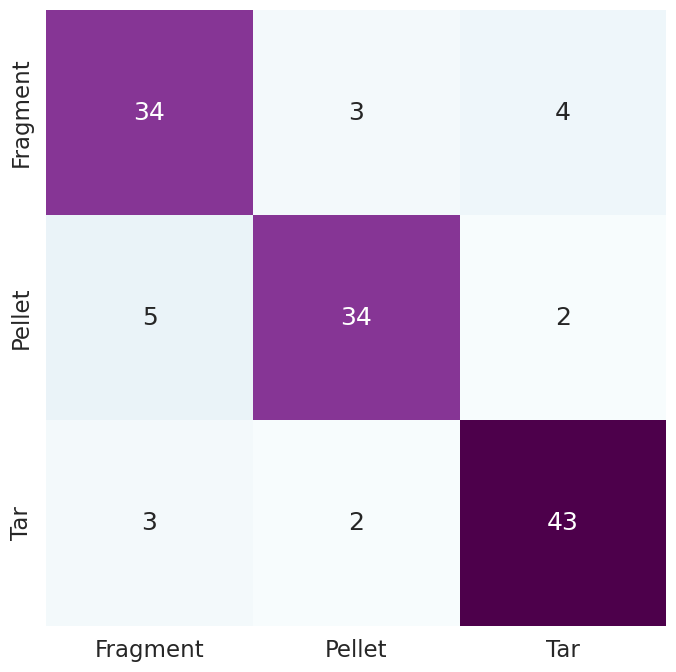

In [66]:
def isBlack(color):
    mask = cv2.inRange(
        color[:3],
        (0, 0, 0),
        (50, 50, 50)
    )

    return np.all(mask == 255)

def countContours(image):
    row = [1000, 2800]
    column = [750, 4000]
    umbral = 100

    image = image[row[0]:row[1], column[0]:column[1]]
    imgg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    null,img_th = cv2.threshold(imgg, umbral, 255, cv2.THRESH_BINARY_INV)

    contours,null = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    fragments = 0
    pellets = 0
    tar = 0

    #img = np.zeros(image.shape)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area <= 40:
            continue

        circ = cv2.minEnclosingCircle(contour)
        circArea = math.pi * circ[1]**2

        mask = np.zeros(img_th.shape, np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        color = cv2.mean(image,mask = mask)
        
        #if compacity < 16 and np.isclose((elipse[1][0]/elipse[1][1]), 1, rtol=0.5):
        if isBlack(color):
            tar += 1
        elif np.isclose(circArea, area, rtol=0.5):
            pellets+=1
        else: #if (area/(w*h)) < 0.7 and (elipse[1][0]/elipse[1][1] < 0.6):
            fragments+=1
        
        #cv2.drawContours(img, [contour], -1, (255,255,255), -1)

    #plt.figure()
    #plt.axis("off")
    #plt.imshow(img)
    return [fragments, pellets, tar]

import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Se cargan las tres imágenes: fragmentos, pellets y alquitrán
fragment = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
pellet = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
tar = cv2.imread('tar-03-olympus-10-01-2020.JPG')

total_fragments, total_pellets, total_tar = countContours(fragment), countContours(pellet), countContours(tar)

conf_matrix = np.array([total_fragments, total_pellets, total_tar])

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cbar=False, 
        cmap='BuPu',
        xticklabels=['Fragment', 'Pellet', 'Tar'], 
        yticklabels=['Fragment', 'Pellet', 'Tar']) 


Accuracy (TP/(n))= 0.19
Precision (TP/(TP+FP)) = 0.20175958391771856
Recall (TP/(TP+FN)) = 0.19
F1 Score (2*(precision*recall)/(precision+recall)) = 0.191904457739193


Text(36.25, 0.5, 'Anotada')

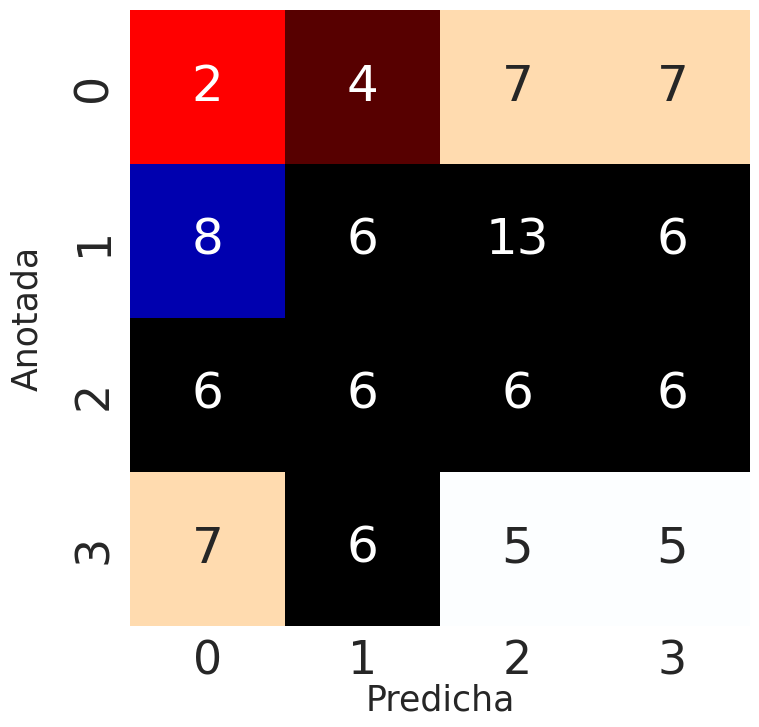

In [2]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)